# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# # Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create empty City dataframe 
cityList = pd.DataFrame(cities,columns={"cityName":cities})
cityList["longitude"] = ""
cityList["latitude"] = ""
cityList["temperature"] = ""
cityList["humidity"] = ""
cityList["cloudiness"] = ""
cityList["windSpeed"] = ""

#create base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#go through rows and append values off result of get request
for index, row in cityList.iterrows():
    #parameters for pull
    parameters = {"q":row["cityName"],"appid":api_key, "units":"imperial"}
    #store result
    result = requests.get(url,params=parameters).json()
    #try to pull values if they exist, else skip
    try:
        print("Processing Record {} | {}".format(index,row["cityName"]))
        cityList.loc[index,"latitude"] = result["coord"]["lat"]
        cityList.loc[index,"longitude"] = result["coord"]["lon"]
        cityList.loc[index,"temperature"] = result["main"]["temp_max"]
        cityList.loc[index,"humidity"] = result["main"]["humidity"]
        cityList.loc[index,"cloudiness"] = result["clouds"]["all"]
        cityList.loc[index,"windSpeed"] = result["wind"]["speed"]
    except:
        print("City not found.  Skipping...")
    #wait 1 seconds to avoid overloading API with requests
    time.sleep(1)

print("---------------------------\n   Data retrieval Complete\n---------------------------")
    
cityList.head()



Processing Record 0 | ponta do sol
Processing Record 1 | rikitea
Processing Record 2 | bredasdorp
Processing Record 3 | illela
Processing Record 4 | cherskiy
Processing Record 5 | georgetown
Processing Record 6 | chuy
Processing Record 7 | nhulunbuy
Processing Record 8 | san patricio
Processing Record 9 | danielskuil
Processing Record 10 | pevek
Processing Record 11 | missoula
Processing Record 12 | te anau
Processing Record 13 | hermanus
Processing Record 14 | saskylakh
Processing Record 15 | atuona
Processing Record 16 | port hardy
Processing Record 17 | port hedland
Processing Record 18 | fortuna
Processing Record 19 | san quintin
Processing Record 20 | taolanaro
City not found.  Skipping...
Processing Record 21 | chandbali
Processing Record 22 | tabiauea
City not found.  Skipping...
Processing Record 23 | komsomolskiy
Processing Record 24 | burnie
Processing Record 25 | bengkulu
City not found.  Skipping...
Processing Record 26 | coihaique
Processing Record 27 | hervey bay
Processi

,cityName,longitude,latitude,temperature,humidity,cloudiness,windSpeed
0,ponta do sol,-46,-20.63,65.7,92,12,3.18
1,rikitea,-134.97,-23.12,75.87,100,12,18.72
2,bredasdorp,20.04,-34.53,61,87,64,8.05
3,illela,4.3,12.25,72.45,64,0,2.95
4,cherskiy,161.3,68.75,32.13,76,0,1.28


In [5]:
result

{'coord': {'lon': 7.39, 'lat': 18.74},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 71.37,
  'pressure': 1007.84,
  'humidity': 32,
  'temp_min': 71.37,
  'temp_max': 71.37,
  'sea_level': 1007.84,
  'grnd_level': 956.55},
 'wind': {'speed': 2.62, 'deg': 262.001},
 'clouds': {'all': 0},
 'dt': 1554343136,
 'sys': {'message': 0.0033,
  'country': 'NE',
  'sunrise': 1554355334,
  'sunset': 1554399869},
 'id': 2447513,
 'name': 'Arlit',
 'cod': 200}

In [6]:
#display cityList info
cityList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
cityName       622 non-null object
longitude      622 non-null object
latitude       622 non-null object
temperature    622 non-null object
humidity       622 non-null object
cloudiness     622 non-null object
windSpeed      622 non-null object
dtypes: object(7)
memory usage: 34.1+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#replace empty values with null
cityList["longitude"].replace("",np.nan,inplace=True)
#drop null values
cleanList = cityList.dropna()

#set index to city name
cleanList = cleanList.set_index("cityName")
#convert dataframe to float
cleanList = cleanList.astype(float)
#confirm float values
cleanList.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, ponta do sol to arlit
Data columns (total 6 columns):
longitude      566 non-null float64
latitude       566 non-null float64
temperature    566 non-null float64
humidity       566 non-null float64
cloudiness     566 non-null float64
windSpeed      566 non-null float64
dtypes: float64(6)
memory usage: 31.0+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

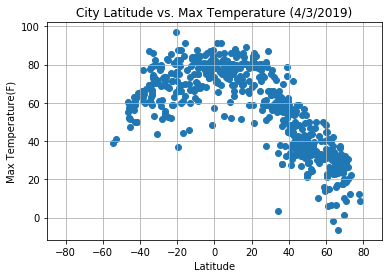

In [8]:
plt.scatter(cleanList["latitude"],cleanList["temperature"],marker="o")
plt.xlim(-90,90)
plt.title("City Latitude vs. Max Temperature (4/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.savefig("LatVSTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

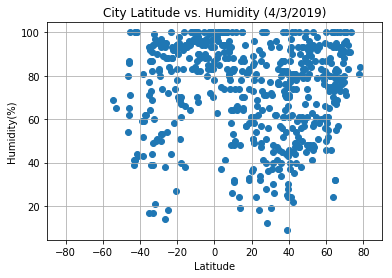

In [9]:
plt.scatter(cleanList["latitude"],cleanList["humidity"],marker="o")
plt.xlim(-90,90)
plt.title("City Latitude vs. Humidity (4/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("LatVSHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

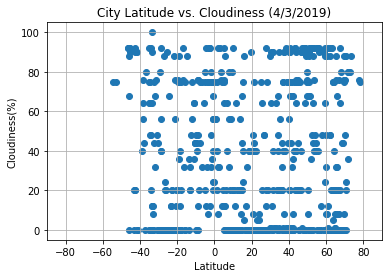

In [10]:
plt.scatter(cleanList["latitude"],cleanList["cloudiness"],marker="o")
plt.xlim(-90,90)
plt.title("City Latitude vs. Cloudiness (4/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("LatVSCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

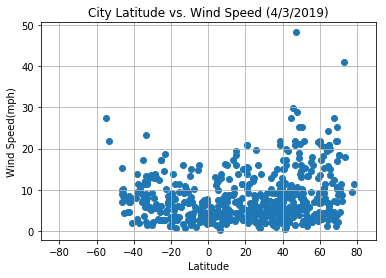

In [11]:
plt.scatter(cleanList["latitude"],cleanList["windSpeed"],marker="o")
plt.xlim(-90,90)
plt.title("City Latitude vs. Wind Speed (4/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()
plt.savefig("LatVSWind.png")
plt.show()